### Imports

In [1]:
import matplotlib.pyplot as plt

### Data 

In [2]:
from dataProcessor import *

### Model

In [3]:
from P3Classifier import *
from CollaborativeFiltering import *

### 5-fold validation

In [4]:
dim = 5
cv = 5
epoch = 10
lr = 0.01
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"
figpath = ""

---------------------------------------CV 1---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.348525
Validation Performance: Avg Loss 0.630576


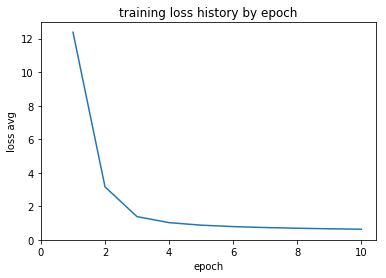

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.006567



---------------------------------------CV 2---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.371865
Validation Performance: Avg Loss 0.638806


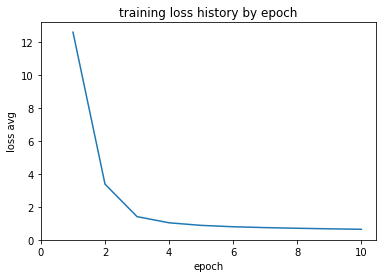

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.008079



---------------------------------------CV 3---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.302850
Validation Performance: Avg Loss 0.627625


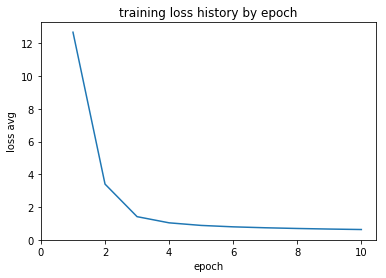

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 0.997978



---------------------------------------CV 4---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.372696
Validation Performance: Avg Loss 0.637261


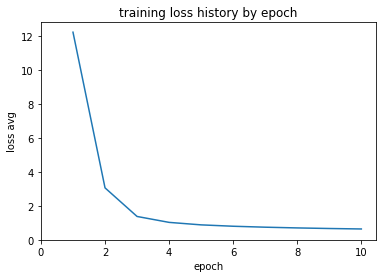

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.002676



---------------------------------------CV 5---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.342830
Validation Performance: Avg Loss 0.619769


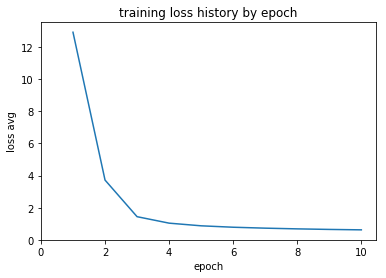

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 0.988105



---------------------------------------summary---------------------------------------


In [5]:
data_loader = CVdataloader(cv, datapath, filename)
for cvRound, (trainData, validData) in enumerate(data_loader):
    q3model = P3Classifier(dim, data_loader.userNum, data_loader.movieNum, epoch, lr)
    
    print("---------------------------------------CV %d---------------------------------------" % (cvRound+1))
    print("       ----------------------------Q3 classifier-----------------------------           ")
    print("Baseline: untrained model Avg Loss: %f" % (q3model.evaluate(validData)))
    loss_history = q3model.train(trainData)
    print("Validation Performance: Avg Loss %f" % loss_history[-1])
    plt.plot(range(1, 1+len(loss_history)), loss_history)
    plt.xlabel("epoch")
    plt.xlim(xmin=0)
    plt.ylabel("loss avg")
    plt.ylim(ymin=0)
    plt.title("training loss history by epoch")
    plt.show()
          
    print("       -----------------------Collaborative Filtering------------------------           ")
    cfmodel = CollaborativeFiltering(dim, data_loader.userNum, data_loader.movieNum)
    cfmodel.train(trainData)
    print("Validation Performance: Avg Loss %f" % cfmodel.evaluate(validData))
    
    print("\n\n")

### 2-fold validation

In [6]:
dim = 5
cv = 2
epoch = 10
lr = 0.01
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"
figpath = ""

---------------------------------------CV 1---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.361613
Validation Performance: Avg Loss 0.653931


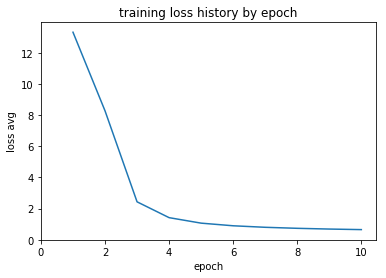

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.043491



---------------------------------------CV 2---------------------------------------
       ----------------------------Q3 classifier-----------------------------           
Baseline: untrained model Avg Loss: 13.333902
Validation Performance: Avg Loss 0.659571


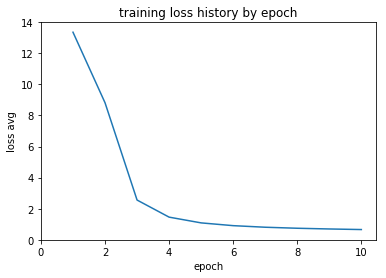

       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.036898





In [7]:
data_loader = CVdataloader(cv, datapath, filename)
for cvRound, (trainData, validData) in enumerate(data_loader):
    q3model = P3Classifier(dim, data_loader.userNum, data_loader.movieNum, epoch, lr)
    
    print("---------------------------------------CV %d---------------------------------------" % (cvRound+1))
    print("       ----------------------------Q3 classifier-----------------------------           ")
    print("Baseline: untrained model Avg Loss: %f" % (q3model.evaluate(validData)))
    loss_history = q3model.train(trainData)
    print("Validation Performance: Avg Loss %f" % loss_history[-1])
    plt.plot(range(1, 1+len(loss_history)), loss_history)
    plt.xlabel("epoch")
    plt.xlim(xmin=0)
    plt.ylabel("loss avg")
    plt.ylim(ymin=0)
    plt.title("training loss history by epoch")
    plt.show()
          
    print("       -----------------------Collaborative Filtering------------------------           ")
    cfmodel = CollaborativeFiltering(dim, data_loader.userNum, data_loader.movieNum)
    cfmodel.train(trainData)
    print("Validation Performance: Avg Loss %f" % cfmodel.evaluate(validData))
    
    print("\n\n")

### Performance on unseen user

In [15]:
dim = 5
epoch = 10
lr = 0.01
seen_ratio = 0.5
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"
figpath = ""

In [17]:
ruser_data_loader = NewUserLoader(cv, datapath, filename, seen_ratio)
trainData = ruser_data_loader.getTrain()
validData = ruser_data_loader.getTest()

ruser_q3model = P3Classifier(dim, ruser_data_loader.userNum, ruser_data_loader.movieNum, epoch, lr)

print("----------------------------Performance on Unseen User (Unseen ratio %.1f)-----------------------------" % (1-seen_ratio))
print("       ----------------------------Q3 classifier-----------------------------           ")
ruser_q3model.train(trainData)
print("Validation Performance: Avg Loss %f" % ruser_q3model.evaluate(validData))

print("       -----------------------Collaborative Filtering------------------------           ")
ruser_cfmodel = CollaborativeFiltering(dim, ruser_data_loader.userNum, ruser_data_loader.movieNum)
ruser_cfmodel.train(trainData)
print("Validation Performance: Avg Loss %f" % ruser_cfmodel.evaluate(validData))

----------------------------Performance on Unseen User (Unseen ratio 0.5)-----------------------------
       ----------------------------Q3 classifier-----------------------------           
Validation Performance: Avg Loss 4.005612
       -----------------------Collaborative Filtering------------------------           


/home/zzhuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Validation Performance: Avg Loss 1.303495


### Performance on unseen item

In [8]:
dim = 5
epoch = 10
lr = 0.01
seen_ratio = 0.5
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"
figpath = ""

In [14]:
ritem_data_loader = NewItemLoader(cv, datapath, filename, seen_ratio)
ritem_q3model = P3Classifier(dim, ritem_data_loader.userNum, ritem_data_loader.movieNum, epoch, lr)
trainData = ritem_data_loader.getTrain()
validData = ritem_data_loader.getTest()

print("----------------------------Performance on Unseen Item (Unseen ratio %.1f)-----------------------------" % (1-seen_ratio))
print("       ----------------------------Q3 classifier-----------------------------           ")
ritem_q3model.train(trainData)
print("Validation Performance: Avg Loss %f" % ritem_q3model.evaluate(validData))

print("       -----------------------Collaborative Filtering------------------------           ")
ritem_cfmodel = CollaborativeFiltering(dim, ritem_data_loader.userNum, ritem_data_loader.movieNum)
ritem_cfmodel.train(trainData)
print("Validation Performance: Avg Loss %f" % ritem_cfmodel.evaluate(validData))

----------------------------Performance on Unseen Item (Unseen ratio 0.5)-----------------------------
       ----------------------------Q3 classifier-----------------------------           
Validation Performance: Avg Loss 3.481164
       -----------------------Collaborative Filtering------------------------           
Validation Performance: Avg Loss 1.189912
